# Data Visualization: criando gráficos com bibliotecas Python

- Matplotlib
- Seaborn
- Plotpy

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("../data/canadian_immegration_data.csv")
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

In [6]:
df.set_index("Country", inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [7]:
anos = list(map(str, range(1980, 2014)))

In [8]:
brasil = df.loc["Brazil", anos]

In [20]:

import plotly.express as px

In [19]:
brasil_dict = {
    'ano' : brasil.index.tolist(),
    "imigrantes" : brasil.values.tolist()
}
dados_brasil = pd.DataFrame(brasil_dict)
dados_brasil.head()

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


In [30]:
fig = px.line(dados_brasil,x='ano', y="imigrantes", title="Imigrantes Brasileiros no Canada de 1980 a 2013")
fig.update_layout(xaxis_title="Ano", yaxis_title="Imigrantes", width=800, height=400, xaxis = {'tickangle':-45})
fig.show()

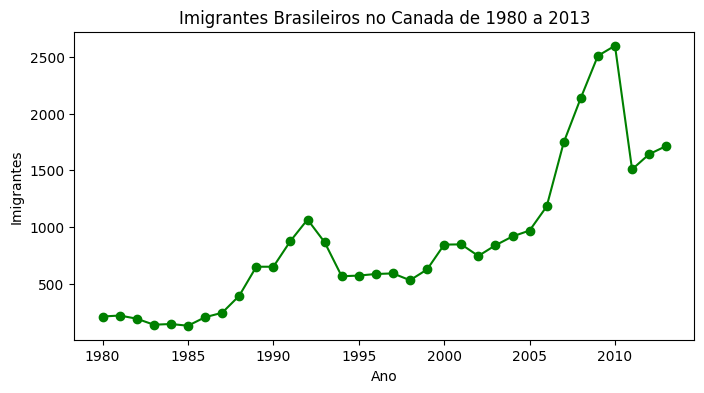

In [11]:
anos_spaced = list(map(str, range(1980, 2014, 5)))
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil.ano, dados_brasil.imigrantes, 'g-o')

ax.set_xticks(anos_spaced)
ax.set_title("Imigrantes Brasileiros no Canada de 1980 a 2013")
ax.set_xlabel("Ano")
ax.set_ylabel("Imigrantes")

plt.show()

### Treino

Comparando Argentina e Brasil

In [12]:
df_compare = df.loc[['Brazil', 'Argentina'], anos].T
df_compare.head()

Country,Brazil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


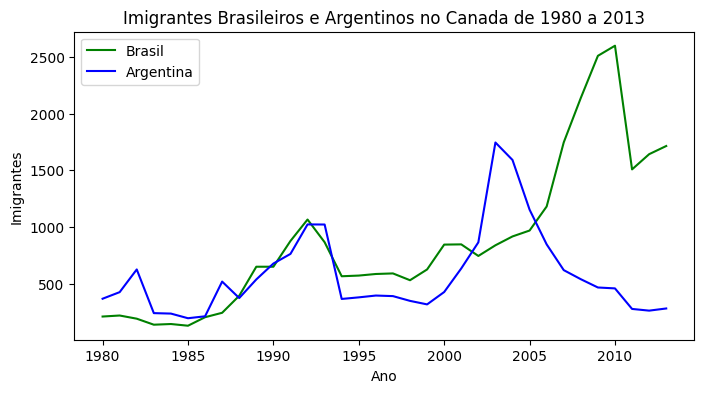

In [13]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax1.plot(df_compare.index, df_compare.Brazil, 'g-', label="Brasil")
ax1.plot(df_compare.index, df_compare.Argentina, 'b-', label="Argentina")

ax1.set_xticks(anos_spaced)
ax1.set_title("Imigrantes Brasileiros e Argentinos no Canada de 1980 a 2013")
ax1.set_xlabel("Ano")
ax1.set_ylabel("Imigrantes")
ax1.legend()

plt.show()

Text(0, 0.5, 'Imigrantes')

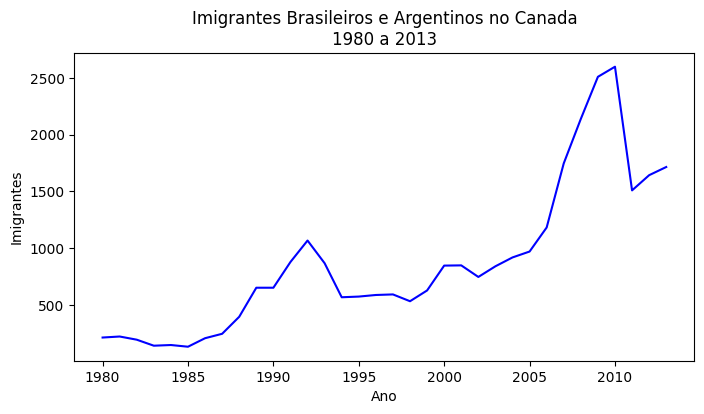

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(dados_brasil.ano, dados_brasil.imigrantes, 'b-', label="Brasil")
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.set_title("Imigrantes Brasileiros e Argentinos no Canada\n1980 a 2013")
ax.set_xlabel("Ano")
ax.set_ylabel("Imigrantes")


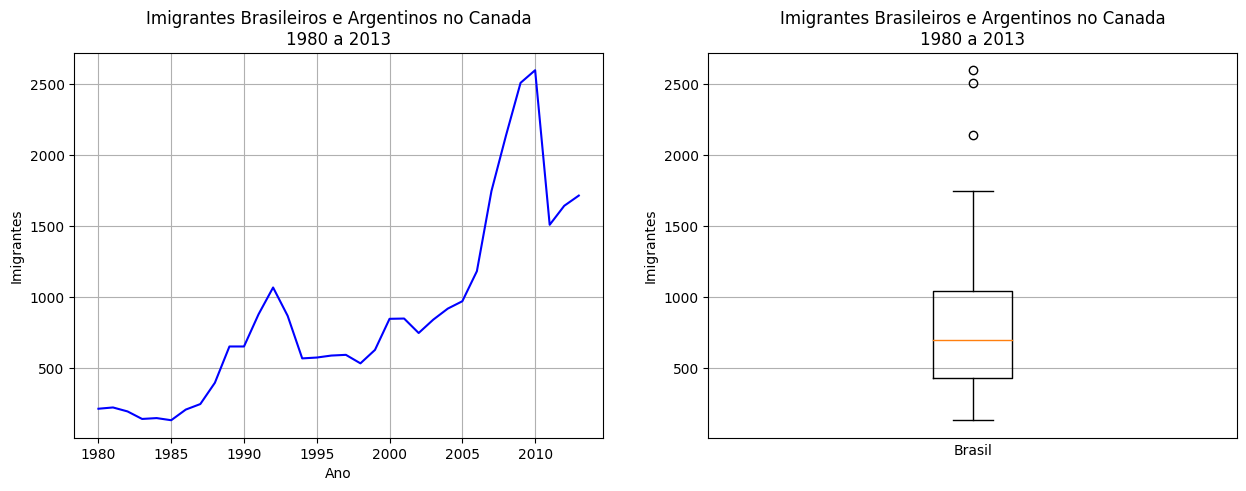

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(dados_brasil.ano, dados_brasil.imigrantes, 'b-', label="Brasil")
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].set_title("Imigrantes Brasileiros e Argentinos no Canada\n1980 a 2013")
axs[0].set_xlabel("Ano")
axs[0].set_ylabel("Imigrantes")
axs[0].grid()

axs[1].boxplot(dados_brasil.imigrantes)
axs[1].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[1].set_title("Imigrantes Brasileiros e Argentinos no Canada\n1980 a 2013")
axs[1].set_xlabel("Brasil")
axs[1].set_ylabel("Imigrantes")
axs[1].grid()


### America do Sul

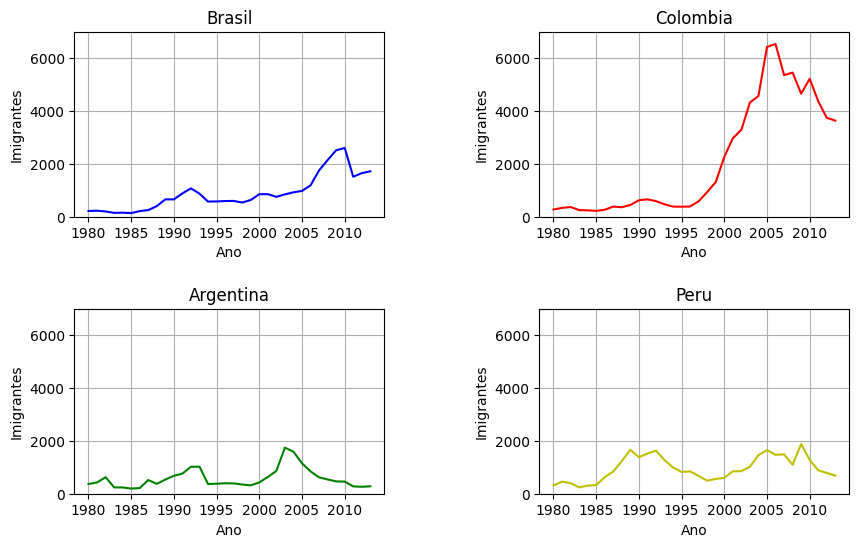

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#Brasil
axs[0, 0].plot(dados_brasil.ano, dados_brasil.imigrantes, 'b-', label="Brasil")
axs[0, 0].set_title("Brasil")

#Colombia
axs[0,1].plot(df.loc['Colombia', anos], 'r-', label="Colombia")
axs[0,1].set_title("Colombia")

#Argentina
axs[1,0].plot(df.loc['Argentina', anos], 'g-', label="Argentina")
axs[1,0].set_title("Argentina")

#Peru
axs[1,1].plot(df.loc['Peru', anos], 'y-', label="Peru")
axs[1,1].set_title("Peru")
y_min = 0
y_max = 7000

for ax in axs.flat:
    ax.set(xlabel='Ano', ylabel='Imigrantes')
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.grid()

for ax in axs.ravel():
    ax.set_ylim(y_min, y_max)

In [17]:
lojas = ['A', 'B', 'C', 'D']

vendas_2022 = {'Jan': [100, 80, 150, 50],
    'Fev': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abr': [180, 110, 230, 90],
    'Mai': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Set': [240, 160, 290, 130],
    'Out': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dez': [300, 350, 400, 250]
}

treino = pd.DataFrame(data=vendas_2022, index=lojas)
treino

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
A,100,120,150,180,220,230,250,260,240,220,400,300
B,80,90,100,110,190,150,170,180,160,140,220,350
C,150,170,200,230,350,280,300,310,290,270,350,400
D,50,60,80,90,200,120,140,150,130,110,190,250


In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.3, wspace=0.4)

#Loja A
axs[0, 0].plot(treino.loc['A'], 'b-', label="Loja A")
axs[0, 0].set_title("Loja A")

#Loja B
axs[0, 1].plot(treino.loc['B'], 'r-', label="Loja B")
axs[0, 1].set_title("Loja B")

#Loja C
axs[1, 0].plot(treino.loc["C"], 'g-', label="Loja C")
axs[1, 0].set_title("Loja C")

#Loja D
axs[1, 1].plot(treino.loc["D"], 'y-', label="Loja D")
axs[1, 1].set_title("Loja D")
y_min = 0
y_max = 500

for ax in axs.flat:
    ax.set(xlabel='Mês', ylabel='Vendas')
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))

for ax in axs.ravel():
    ax.set_ylim(y_min, y_max)

Error in callback <function flush_figures at 0x11bb96d30> (for post_execute):


KeyboardInterrupt: 